In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
data = pd.read_csv("iris-data.csv")

**Exercise 1**: Check if the data is encoded properly. Are there mistakes?

In [3]:
# Inspect the first few rows of the data
data.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Inspect descriptive statistics of the data
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check datatypes of all columns
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [6]:
# Chech unique values of "class"
data["class"].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [7]:
# Rename class names
data["class"] = data["class"].str.replace("Iris-virginica","virginica")
data["class"] = data["class"].str.replace("Iris-setosa","setosa")
data["class"] = data["class"].str.replace("Iris-setossa","setosa")
data["class"] = data["class"].str.replace("Iris-versicolor","versicolor")

data["class"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

**Exercise 2**: Does the data fall within the expected range? Use domain knowledge whenever possible to define that expected range. Do the ranges I see make sense for my data? Do I have variables that I should put on the same scale, or change their scale?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bcf2bc890>,
      dtype=object)

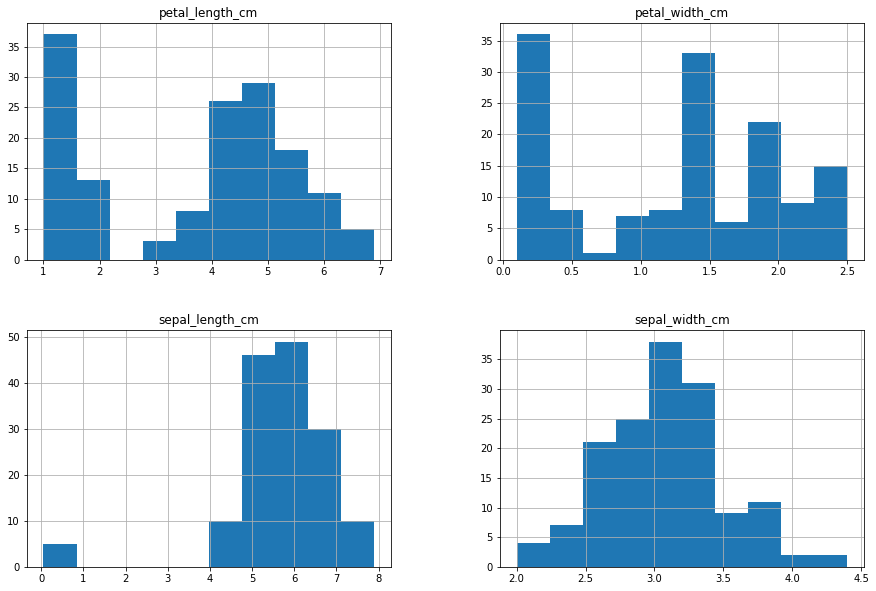

In [8]:
# Check distribution of all columns
data.hist(figsize=(15,10))

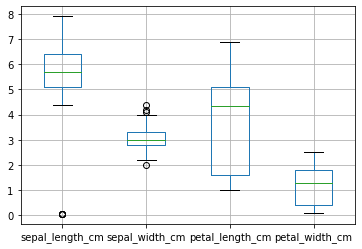

In [9]:
# Create a boxplot to visualy investigate if the data contains possible outliers
data.boxplot()

In [10]:
# Create a dataframe to identify possible outliers
stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']

outliers = pd.DataFrame(columns=data.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Outlier
77,0.067,3.0,5.0,1.7,versicolor,sepal_length_cm
78,0.060,2.9,4.5,1.5,versicolor,sepal_length_cm
79,0.057,2.6,3.5,1.0,versicolor,sepal_length_cm
80,0.055,2.4,3.8,1.1,versicolor,sepal_length_cm
81,0.055,2.4,3.7,1.0,versicolor,sepal_length_cm


In [11]:
""" 
It seems that the outliers are too small values. 
I'm going to replace these values for the median 
"""

" \nIt seems that the outliers are too small values. \nI'm going to replace these values for the median \n"

In [12]:
# First identify the maximum value of the outliers
outlier_max = float(outliers["sepal_length_cm"].max())
outlier_max

# Then identify the median value of the sepal length
median = float(data["sepal_length_cm"].median())
median

# Now replace the outliers for the median
data["sepal_length_cm"] = np.where(data["sepal_length_cm"] <= outlier_max, median, data["sepal_length_cm"])

# Source: https://stackoverflow.com/questions/45386955/python-replacing-outliers-values-with-median-values

In [13]:
# Check if the outliers are changed
stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']

outliers = pd.DataFrame(columns=data.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Outlier


**Exercise 3**: Do our variables include null values? If so, is the number of nulls acceptable? Do they follow a pattern or are they random? Should we replace it or drop it?

In [14]:
# First check for null values
print("First check for null values:")
print(data.isnull().sum())

""" 
It seems that there are 5 empty values. 
I'm going to fill these values with the mean.
"""

# Then identify the median value of the sepal length
mean = float(data["petal_width_cm"].mean())

# Now replace the empty values for the mean
data["petal_width_cm"].fillna(mean, inplace = True) 

# Check if the null values are filled
print("\nNumber of empty values:", data["petal_width_cm"].isnull().sum())

First check for null values:
sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

Number of empty values: 0


In [15]:
# Check how many duplicates are dropped (if there are any)
before = len(data)
data.drop_duplicates()
after = len(data)
print("Number of rows dropped:", str(before-after))

Number of rows dropped: 0


**Exercise 4**: Check for correlation. Are variables in our dataset correlated with one another or with the outcome? How strong is this correlation?

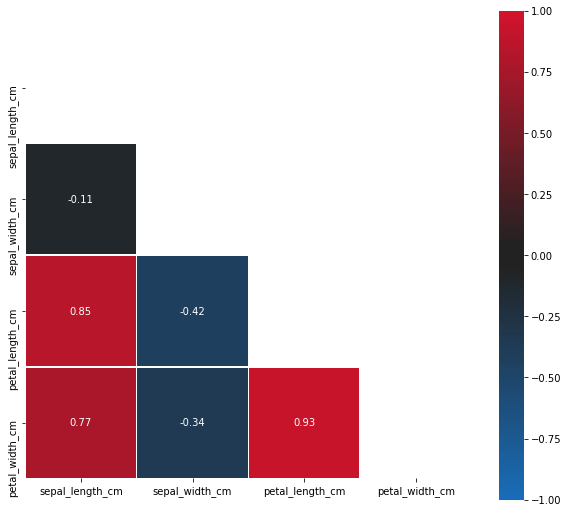

In [16]:
# Create correlation heatmap
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(250, 10, s=95, l=45,n=9, center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,square=True, linewidths=.5, 
                cbar_kws={"shrink": .9}, annot=True)

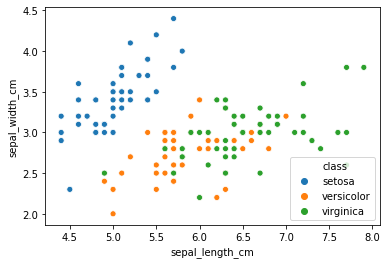

In [17]:
# Create scatterplot for sepal by class
sns.scatterplot(x="sepal_length_cm", y="sepal_width_cm", hue="class", data=data)

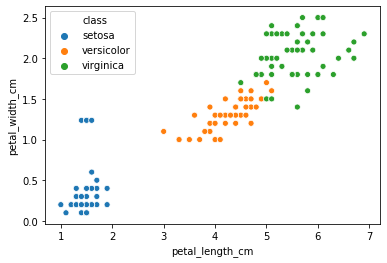

In [18]:
# Create scatterplot for petal by class
sns.scatterplot(x="petal_length_cm", y="petal_width_cm", hue="class", data=data)

In [19]:
# Save new file
data.to_csv("iris-data-clean.csv",index=False)